In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
spotify = pd.read_csv(url)

# Basic overview
spotify.info()
spotify.describe()
spotify.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
#We will take in User name, Genre preference, Subgenre preference 
#so let's calculate some basic statistics based on the genre first
df.groupby('playlist_genre').agg({
    'track_popularity' : ['mean', 'median'],
    'danceability' : ['mean', 'median']
})

track_popularity        danceability       
                           mean median         mean median
playlist_genre                                            
edm                   38.019358   38.0     0.655086  0.661
latin                 51.428374   53.0     0.715671  0.729
pop                   49.694667   53.0     0.649928  0.663
r&b                   50.256363   54.0     0.664232  0.679
rap                   47.801034   51.0     0.716293  0.734
rock                  37.240976   37.0     0.507340  0.509

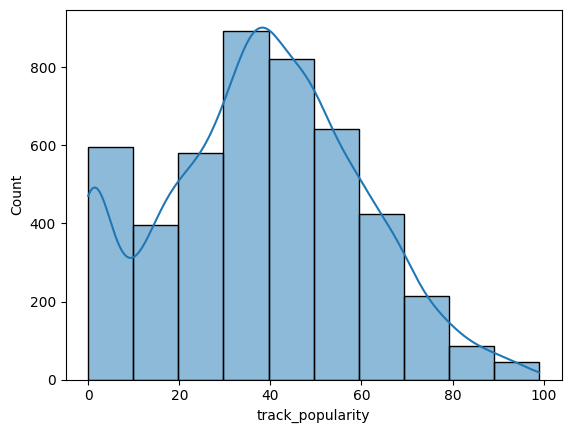

In [4]:
#We are going to want to create some graphs using the variables we are
#making the calculations from. Here's an example of something that might
#be helpful to display, the distribution of the track popularity for a
#specific genre, which would be the user inputted one
filtered_df = df[df['playlist_genre'] == 'edm']
sns.histplot(filtered_df['track_popularity'], bins=10, kde=True)
plt.show()

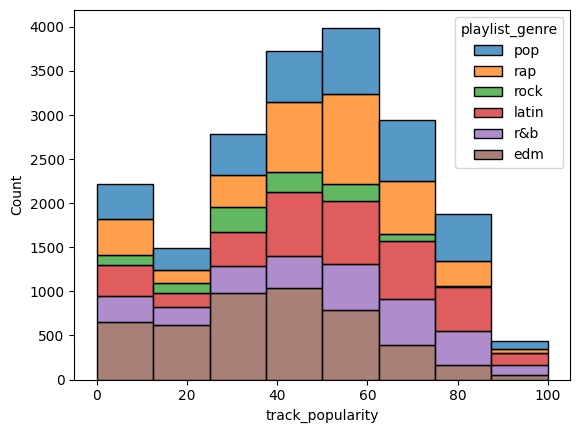

In [5]:
#Here's a stacked histogram to display what we might want to show if we want
#more in depth description of a specific variable across all groups.
sns.histplot(data=df, x='track_popularity', hue='playlist_genre', multiple='stack', bins=8)
plt.show()

In [6]:
#Here are just a few statistics we can generate for each of the subgenres.
#Having these calculations on hand will allow us to connect a specific average
#to an inputted subgenre.

#For example, the user says their preferred subgenre is classic rock.
#We can see that the mean danceability is 0.544.
#From there, we can look for songs that have around that danceability score to make a better recommendation!
df.groupby('playlist_subgenre').agg({
    'track_popularity' : ['mean', 'median'],
    'danceability' : ['mean', 'median']
})
#These are just a few variables and a few calculations, so we will want to do
#more than just this! This is just to help everyone get started.

track_popularity        danceability        
                                      mean median         mean  median
playlist_subgenre                                                     
album rock                       28.705882   34.5     0.511500  0.5335
big room                         34.124623   34.0     0.622299  0.6300
classic rock                     33.187166   34.0     0.544214  0.5480
dance pop                        52.310156   56.0     0.659307  0.6730
electro house                    37.467939   38.0     0.701180  0.7090
electropop                       48.918621   55.0     0.649016  0.6580
gangster rap                     38.299053   40.0     0.721330  0.7400
hard rock                        37.377256   37.0     0.482195  0.4865
hip hop                          53.708229   55.0     0.719627  0.7340
hip pop                          56.723920   62.0     0.676923  0.6880
indie poptimism                  42.888969   46.0     0.633506  0.6450
latin hip hop                    51.164790   56.0     0.731200  0.7410
latin pop                        56.113450   59.0     0.701029  0.7230
neo soul                         39.391417   42.0     0.649990  0.6680
new jack swing                   19.200000   15.0     0.729880  0.7550
permanent wave                   43.087963   48.0     0.538602  0.5415
pop edm                          45.433005   46.0     0.649052  0.6560
post-teen pop                    62.801835   70.0     0.674125  0.6910
progressive electro house        33.186047   35.0     0.636676  0.6440
reggaeton                        62.061462   66.0     0.758322  0.7685
southern hip hop                 40.370690   42.0     0.697341  0.7100
trap                             50.453470   54.0     0.717129  0.7385
tropical                         42.841794   45.0     0.691705  0.7030
urban contemporary               53.349174   58.0     0.661409  0.6760

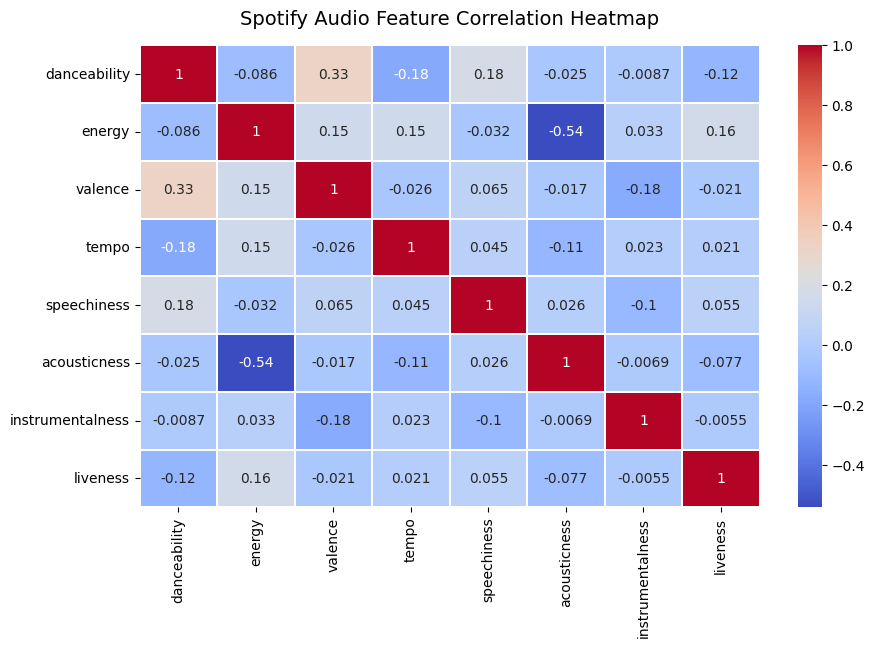

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(spotify[features].corr(), annot=True, cmap='coolwarm', linewidths=0.3)
plt.title("Spotify Audio Feature Correlation Heatmap", fontsize=14, pad=15)
plt.show()

C:\Users\ahire\AppData\Local\Temp\ipykernel_29508\3150532524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify, x='playlist_genre', y='energy', palette='mako')


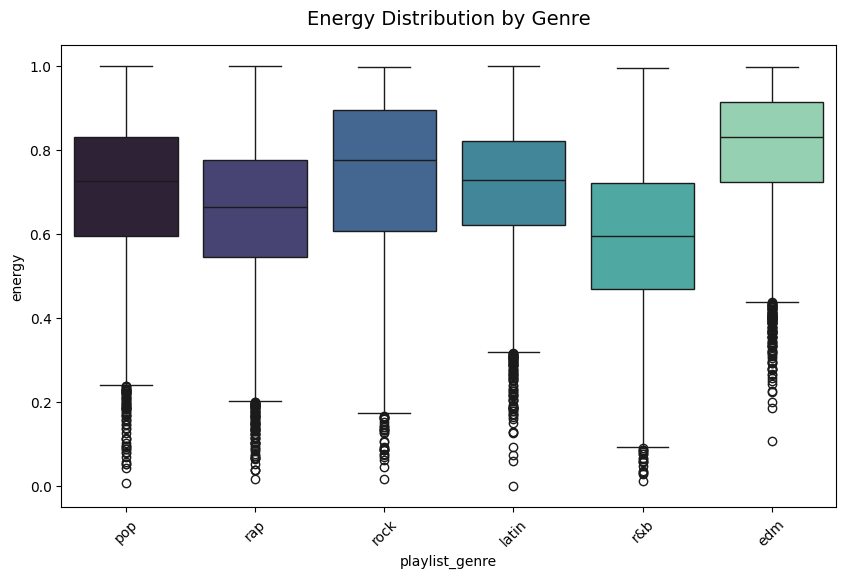

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=spotify, x='playlist_genre', y='energy', palette='mako')
plt.xticks(rotation=45)
plt.title("Energy Distribution by Genre", fontsize=14, pad=15)
plt.show()

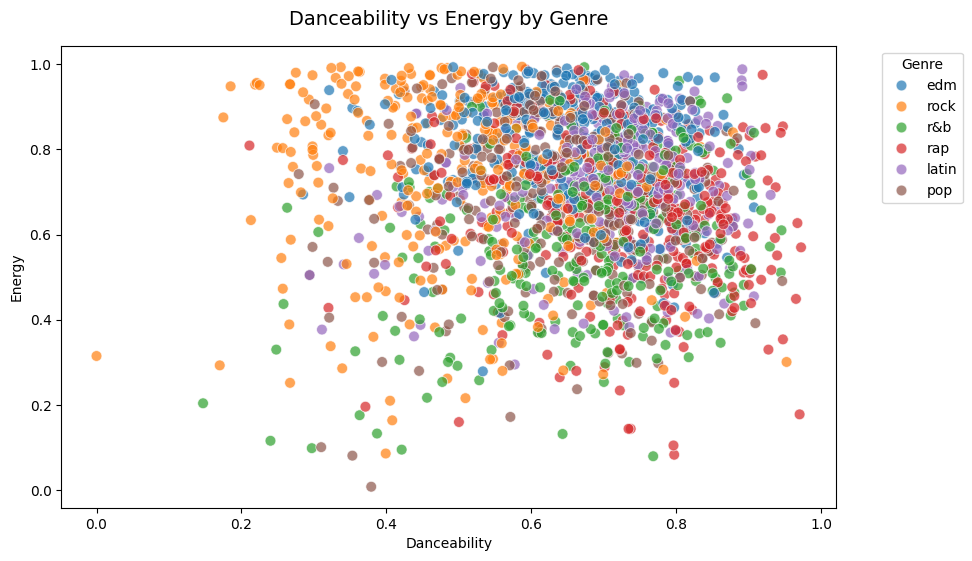

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=spotify.sample(2000, random_state=42),
    x='danceability', y='energy',
    hue='playlist_genre', alpha=0.7, s=60
)
plt.title("Danceability vs Energy by Genre", fontsize=14, pad=15)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

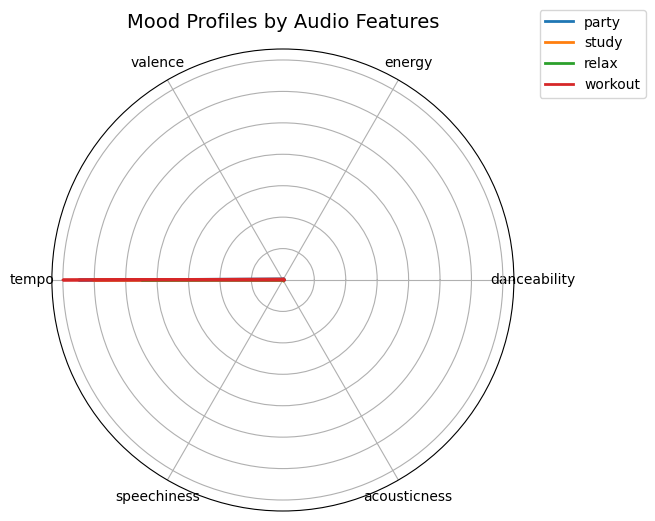

In [35]:
import numpy as np

mood_profiles = {
    'party': {'danceability': 0.9, 'energy': 0.9, 'valence': 0.8, 'tempo': 130},
    'study': {'acousticness': 0.8, 'instrumentalness': 0.7, 'energy': 0.3, 'valence': 0.4},
    'relax': {'acousticness': 0.7, 'valence': 0.5, 'energy': 0.4, 'tempo': 90},
    'workout': {'energy': 0.95, 'tempo': 140, 'danceability': 0.8, 'valence': 0.7}
}

labels = list(features[:6])
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

for mood, vals in mood_profiles.items():
    values = [vals.get(f, np.mean(spotify[f])) for f in labels]
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=mood)
    ax.fill(angles, values, alpha=0.15)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Mood Profiles by Audio Features", fontsize=14, pad=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [1]:
import pandas as pd

# Load data
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
spotify = pd.read_csv(url)

# Keep only needed columns
cols = ['playlist_genre', 'danceability', 'energy', 'valence', 'tempo', 'acousticness']
spotify = spotify[cols].dropna()

# Mean & median by genre
print("\nMean by Genre:")
print(spotify.groupby('playlist_genre').mean().round(3))

print("\nMedian by Genre:")
print(spotify.groupby('playlist_genre').median().round(3))

# Compare pop vs rock
pop = spotify[spotify['playlist_genre'] == 'pop']
rock = spotify[spotify['playlist_genre'] == 'rock']
print("\nDanceability diff (Pop - Rock):", round(pop['danceability'].mean() - rock['danceability'].mean(), 3))
print("Energy diff (Pop - Rock):", round(pop['energy'].mean() - rock['energy'].mean(), 3))

# Correlation
print("\nCorrelation Matrix:")
print(spotify[cols[1:]].corr().round(2))

# Most danceable song info
top = spotify.loc[spotify['danceability'].idxmax(), ['playlist_genre', 'danceability', 'energy', 'valence']]
print("\nMost Danceable Song:")
print(top)



Mean by Genre:
                danceability  energy  valence    tempo  acousticness
playlist_genre                                                      
edm                    0.655   0.802    0.401  125.768         0.082
latin                  0.713   0.708    0.606  118.622         0.211
pop                    0.639   0.701    0.504  120.743         0.171
r&b                    0.670   0.591    0.531  114.222         0.260
rap                    0.718   0.651    0.505  120.655         0.192
rock                   0.521   0.733    0.537  124.989         0.145

Median by Genre:
                danceability  energy  valence    tempo  acousticness
playlist_genre                                                      
edm                    0.659   0.830    0.370  127.056         0.019
latin                  0.729   0.729    0.628  110.962         0.139
pop                    0.652   0.727    0.500  120.017         0.077
r&b                    0.689   0.596    0.542  108.744         0.165
